# Graph Analysis for Drug-Disease Interaction Prediction

This notebook demonstrates the use of graph analysis techniques on the knowledge graph built from biomedical data sources. We'll explore the graph structure, calculate centrality measures, find important paths between drugs and diseases, and visualize the results.

## Setup

First, let's import the necessary libraries and load the knowledge graph.

In [1]:
import os
import sys
import pickle
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Ensure we can import from src
sys.path.append(str(Path.cwd().parent))

# Import our modules
from src.ddi.analysis.graph_analysis import GraphAnalyzer
from src.ddi.visualization.graph_viz import GraphVisualizer

# Set up plotting defaults
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)
%matplotlib inline

### Load the Knowledge Graph

We'll load the knowledge graph that we built in the previous steps.

In [2]:
# Path to the saved graph file
graph_path = "../data/graph/full/knowledge_graph.pickle"

# Load the graph
with open(graph_path, "rb") as f:
    graph = pickle.load(f)

print(f"Loaded knowledge graph with {graph.number_of_nodes()} nodes and {graph.number_of_edges()} edges")

# Create analyzer and visualizer
analyzer = GraphAnalyzer(graph)
visualizer = GraphVisualizer(output_dir="../figures")

Loaded knowledge graph with 17430 nodes and 0 edges


## 1. Basic Graph Statistics

Let's start by examining the basic statistics of our knowledge graph.

In [3]:
# Get basic statistics
stats = analyzer.get_basic_statistics()

# Display node and edge counts
print(f"Number of nodes: {stats['num_nodes']}")
print(f"Number of edges: {stats['num_edges']}")
print(f"Graph density: {stats['density']:.6f}")
print(f"Connected components: {stats['num_connected_components']}")
print(f"Largest component size: {stats['largest_component_size']} nodes "
      f"({stats['largest_component_percentage']:.2f}% of total)")

# Display degree statistics
print("\nDegree statistics:")
for stat, value in stats["degree_stats"].items():
    print(f"  {stat}: {value:.2f}")

# Create a table of node types
node_types_df = pd.DataFrame({
    "Node Type": list(stats["node_types"].keys()),
    "Count": list(stats["node_types"].values())
}).sort_values("Count", ascending=False).reset_index(drop=True)

# Display node types
print("\nNode types:")
display(node_types_df)

# Create a table of edge types
edge_types_df = pd.DataFrame({
    "Edge Type": list(stats["edge_types"].keys()),
    "Count": list(stats["edge_types"].values())
}).sort_values("Count", ascending=False).reset_index(drop=True)

# Display edge types
print("\nEdge types:")
display(edge_types_df)

Number of nodes: 17430
Number of edges: 0
Graph density: 0.000000
Connected components: 17430
Largest component size: 1 nodes (0.01% of total)

Degree statistics:
  min: 0.00
  max: 0.00
  mean: 0.00
  median: 0.00

Node types:


,Node Type,Count
0,drug,17430



Edge types:


,Edge Type,Count


### Visualize Node and Edge Type Distributions

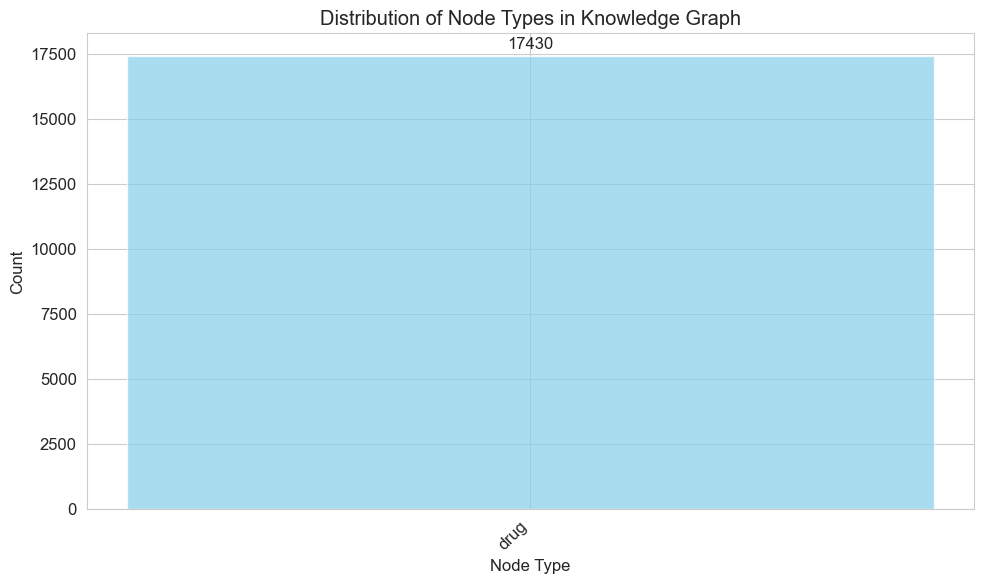

In [4]:
# Plot node type distribution
node_type_fig = visualizer.plot_node_type_distribution(
    stats["node_types"], 
    title="Distribution of Node Types in Knowledge Graph",
    save_path="node_type_distribution.png"
)
plt.show()

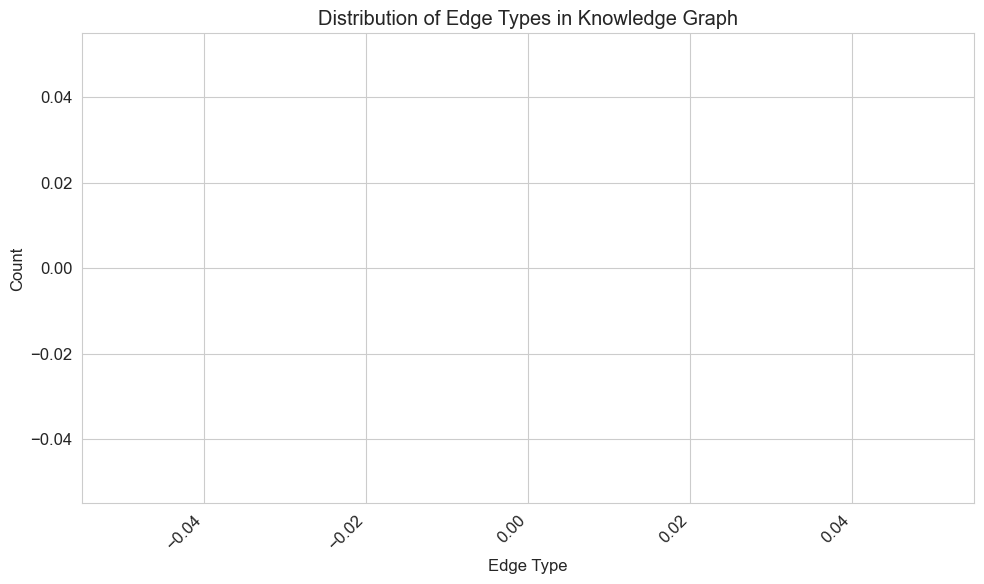

In [5]:
# Plot edge type distribution
edge_type_fig = visualizer.plot_edge_type_distribution(
    stats["edge_types"], 
    title="Distribution of Edge Types in Knowledge Graph",
    save_path="edge_type_distribution.png"
)
plt.show()

### Degree Distribution

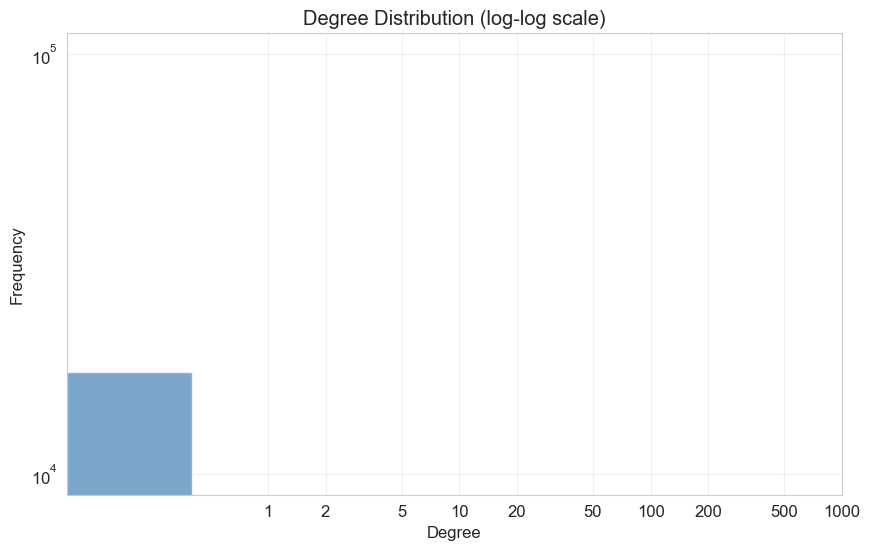

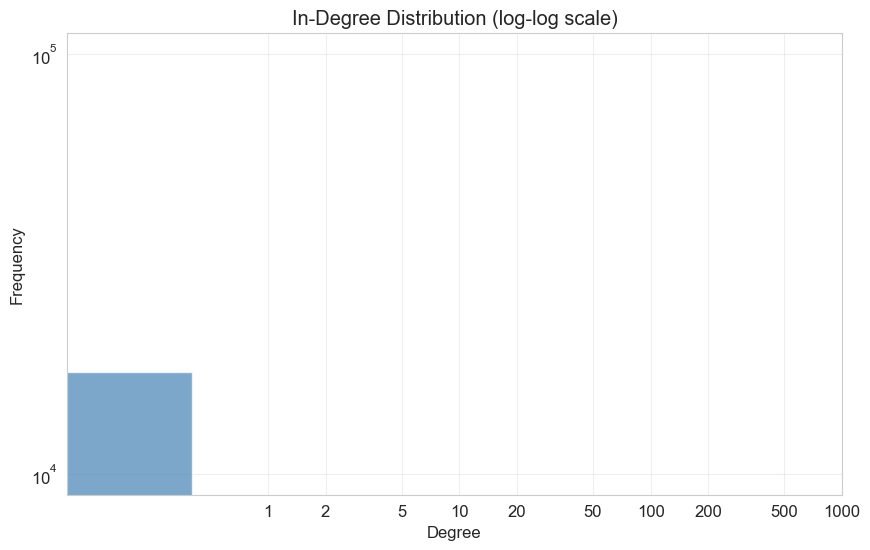

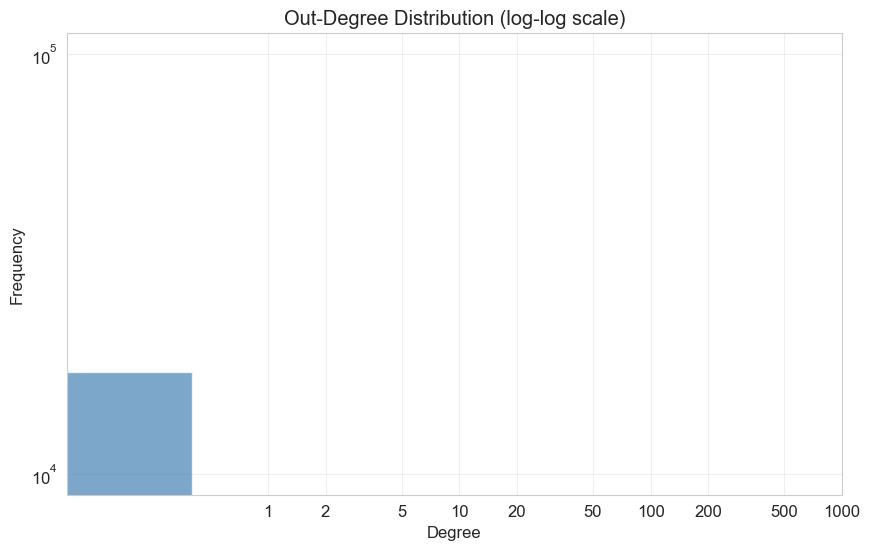

In [6]:
# Get degree distribution
degree_dist = analyzer.get_degree_distribution()

# Plot overall degree distribution (log-log scale)
degree_fig = visualizer.plot_degree_distribution(
    degree_dist["degree"],
    log_scale=True,
    title="Degree Distribution (log-log scale)",
    save_path="degree_distribution_log.png"
)
plt.show()

# Plot in-degree distribution
in_degree_fig = visualizer.plot_degree_distribution(
    degree_dist["in_degree"],
    log_scale=True,
    title="In-Degree Distribution (log-log scale)",
    save_path="in_degree_distribution_log.png"
)
plt.show()

# Plot out-degree distribution
out_degree_fig = visualizer.plot_degree_distribution(
    degree_dist["out_degree"],
    log_scale=True,
    title="Out-Degree Distribution (log-log scale)",
    save_path="out_degree_distribution_log.png"
)
plt.show()

Let's also look at the degree distribution for specific node types.

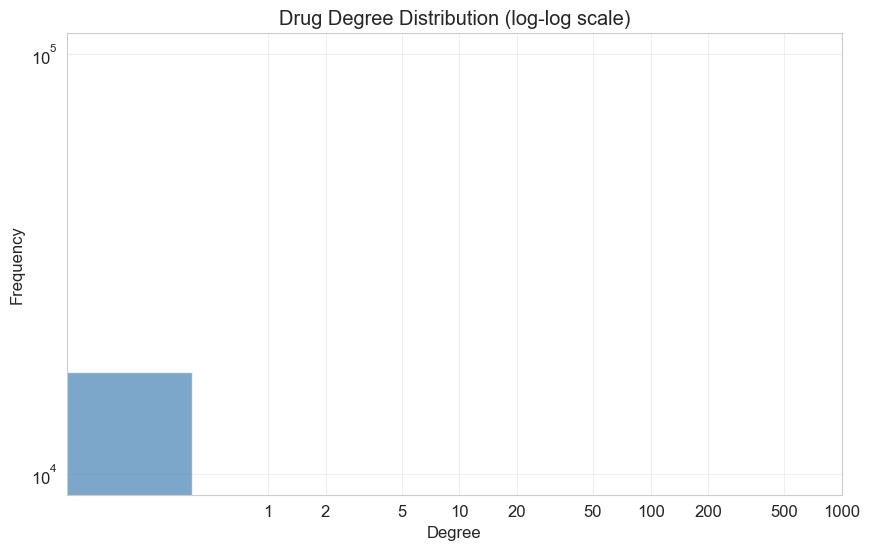

ValueError: Data has no positive values, and therefore cannot be log-scaled.

Error in callback <function _draw_all_if_interactive at 0x12fe92e80> (for post_execute), with arguments args (),kwargs {}:


ValueError: Data has no positive values, and therefore cannot be log-scaled.

ValueError: Data has no positive values, and therefore cannot be log-scaled.

<Figure size 1000x600 with 1 Axes>

In [7]:
# Node types to analyze
key_node_types = ["drug", "disease", "protein"]

for node_type in key_node_types:
    # Get degree distribution for this node type
    type_dist = analyzer.get_degree_distribution(node_type=node_type)
    
    # Plot degree distribution
    fig = visualizer.plot_degree_distribution(
        type_dist["degree"],
        log_scale=True,
        title=f"{node_type.capitalize()} Degree Distribution (log-log scale)",
        save_path=f"{node_type}_degree_distribution_log.png"
    )
    plt.show()

## 2. Centrality Analysis

Now let's identify the most central nodes in our knowledge graph using different centrality measures.

### Degree Centrality

Let's find the most connected nodes in the graph.

In [ ]:
# Calculate degree centrality for all nodes
degree_cent = analyzer.calculate_centrality(centrality_type="degree", top_n=20)

# Display results
display(degree_cent)

# Visualize top results
fig = visualizer.plot_centrality_distribution(
    degree_cent, 
    top_n=20,
    title="Top 20 Nodes by Degree Centrality",
    save_path="degree_centrality_top20.png"
)
plt.show()

Let's look at the most central drugs and diseases specifically.

In [ ]:
# Calculate degree centrality for drugs
drug_cent = analyzer.calculate_centrality(centrality_type="degree", node_types=["drug"], top_n=10)

# Display results
print("Top 10 drugs by degree centrality:")
display(drug_cent)

# Visualize
fig = visualizer.plot_centrality_distribution(
    drug_cent, 
    title="Top 10 Drugs by Degree Centrality",
    save_path="drug_degree_centrality.png"
)
plt.show()

In [ ]:
# Calculate degree centrality for diseases
disease_cent = analyzer.calculate_centrality(centrality_type="degree", node_types=["disease"], top_n=10)

# Display results
print("Top 10 diseases by degree centrality:")
display(disease_cent)

# Visualize
fig = visualizer.plot_centrality_distribution(
    disease_cent, 
    title="Top 10 Diseases by Degree Centrality",
    save_path="disease_degree_centrality.png"
)
plt.show()

### Betweenness Centrality

Let's identify nodes that act as bridges in the network.

In [ ]:
# Calculate betweenness centrality
between_cent = analyzer.calculate_centrality(centrality_type="betweenness", top_n=20)

# Display results
print("Top 20 nodes by betweenness centrality:")
display(between_cent)

# Visualize
fig = visualizer.plot_centrality_distribution(
    between_cent, 
    title="Top 20 Nodes by Betweenness Centrality",
    save_path="betweenness_centrality.png"
)
plt.show()

### PageRank

Let's use PageRank to identify influential nodes.

In [ ]:
# Calculate PageRank centrality
pagerank = analyzer.calculate_centrality(centrality_type="pagerank", top_n=20)

# Display results
print("Top 20 nodes by PageRank:")
display(pagerank)

# Visualize
fig = visualizer.plot_centrality_distribution(
    pagerank, 
    title="Top 20 Nodes by PageRank",
    save_path="pagerank.png"
)
plt.show()

## 3. Community Detection

Let's identify communities in the knowledge graph.

In [ ]:
# Detect communities
communities = analyzer.detect_communities(resolution=1.0)

# Print summary
print(f"Detected {communities['num_communities']} communities with modularity {communities['modularity']:.4f}")

# Display statistics for top 5 communities
top_communities = communities["communities"][:5]

print("\nTop 5 communities:")
for i, comm in enumerate(top_communities):
    print(f"\nCommunity {i+1} (ID: {comm['community_id']})")
    print(f"Size: {comm['size']} nodes ({comm['percentage']:.2f}% of total)")
    print(f"Density: {comm['density']:.4f}")
    print(f"Node types: {comm['node_types']}")
    print(f"Key nodes: {[n['name'] for n in comm['key_nodes'][:3]]}")

In [ ]:
# Visualize community size distribution
fig = visualizer.plot_community_distribution(
    communities, 
    top_n=10,
    title="Top 10 Communities by Size",
    save_path="community_sizes.png"
)
plt.show()

In [ ]:
# Visualize community composition
fig = visualizer.plot_community_composition(
    communities, 
    top_n=5,
    title="Node Type Composition of Top 5 Communities",
    save_path="community_composition.png"
)
plt.show()

## 4. Path Analysis

Let's analyze paths between drugs and diseases in the knowledge graph.

### Find Shortest Paths between Drugs and Diseases

In [ ]:
# Find shortest paths from drugs to diseases
paths = analyzer.find_shortest_paths(source_type="drug", target_type="disease", max_paths=10)

# Display summary of paths
print(f"Found {len(paths)} paths from drugs to diseases")

# Create a table of paths
path_data = []
for path in paths:
    path_data.append({
        "Source": path["source_name"],
        "Target": path["target_name"],
        "Length": path["length"],
        "Path": " -> ".join(path["path_names"])
    })

path_df = pd.DataFrame(path_data)
display(path_df)

### Visualize a Specific Path

In [ ]:
# Select a path to visualize (the shortest one)
if paths:
    shortest_path = min(paths, key=lambda x: x["length"])
    print(f"Visualizing path from {shortest_path['source_name']} to {shortest_path['target_name']}")
    print(f"Path length: {shortest_path['length']}")
    print(f"Path: {' -> '.join(shortest_path['path_names'])}")
    
    # Visualize the path
    fig = visualizer.visualize_path(
        shortest_path,
        save_path="shortest_drug_disease_path.png"
    )
    plt.show()
else:
    print("No paths found")

### Find Paths for a Specific Drug-Disease Pair

Let's pick one of the most central drugs and diseases and find all paths between them.

In [ ]:
# Get top drug and disease IDs
if len(drug_cent) > 0 and len(disease_cent) > 0:
    top_drug_id = drug_cent.iloc[0]["node_id"]
    top_drug_name = drug_cent.iloc[0]["name"]
    top_disease_id = disease_cent.iloc[0]["node_id"]
    top_disease_name = disease_cent.iloc[0]["name"]
    
    print(f"Finding paths between {top_drug_name} and {top_disease_name}")
    
    # Find all paths between them
    drug_disease_paths = analyzer.find_drug_disease_paths(
        drug_id=top_drug_id, 
        disease_id=top_disease_id,
        max_paths=5
    )
    
    # Display paths
    print(f"Found {len(drug_disease_paths)} paths")
    
    for i, path in enumerate(drug_disease_paths):
        print(f"\nPath {i+1}:")
        print(f"Length: {path['length']}")
        print(f"Path: {' -> '.join(path['path_names'])}")
        print(f"Types: {' -> '.join(path['path_types'])}")
    
    # Visualize the first path
    if drug_disease_paths:
        fig = visualizer.visualize_path(
            drug_disease_paths[0],
            save_path="top_drug_disease_path.png"
        )
        plt.show()
else:
    print("No drugs or diseases with centrality data")

## 5. Common Neighbor Analysis

Let's find drug-disease pairs that share common neighbors (potential indirect connections).

In [ ]:
# Find drug-disease pairs with common neighbors
common_neighbors = analyzer.find_common_neighbors(
    node_type_a="drug", 
    node_type_b="disease",
    min_neighbors=2,  # At least 2 common neighbors
    max_results=20
)

# Display results
print(f"Found {len(common_neighbors)} drug-disease pairs with at least 2 common neighbors")

# Create a table of results
neighbor_data = []
for result in common_neighbors:
    neighbor_data.append({
        "Drug": result["node_a_name"],
        "Disease": result["node_b_name"],
        "Common Neighbors": result["common_neighbors_count"],
        "Neighbor Names": ", ".join([n["name"] for n in result["common_neighbors"][:3]]) + 
                          ("..." if len(result["common_neighbors"]) > 3 else "")
    })

neighbor_df = pd.DataFrame(neighbor_data)
display(neighbor_df)

## 6. Network Visualization

Let's visualize parts of our knowledge graph.

### Visualize a Drug-Protein-Disease Subgraph

In [ ]:
# Extract a subgraph with drugs, proteins, and diseases
subgraph = analyzer.extract_subgraph(
    node_types=["drug", "protein", "disease"],
    edge_types=["targets", "associated_with", "treats"],
    max_nodes=50
)

print(f"Extracted subgraph with {subgraph.number_of_nodes()} nodes and {subgraph.number_of_edges()} edges")

# Visualize the subgraph
fig = visualizer.visualize_graph(
    subgraph,
    node_color_attribute="type",
    node_size_attribute="degree",
    edge_color_attribute="type",
    layout="spring",
    title="Drug-Protein-Disease Subgraph",
    save_path="drug_protein_disease_subgraph.png"
)
plt.show()

### Visualize a Specific Drug's Neighborhood

In [ ]:
# Get the neighborhood of the top drug
if len(drug_cent) > 0:
    top_drug_id = drug_cent.iloc[0]["node_id"]
    top_drug_name = drug_cent.iloc[0]["name"]
    
    # Get 1-hop neighborhood
    hood = analyzer.get_entity_neighborhood(entity_id=top_drug_id, hops=1)
    print(f"1-hop neighborhood of {top_drug_name} has {hood.number_of_nodes()} nodes and {hood.number_of_edges()} edges")
    
    # Visualize
    fig = visualizer.visualize_graph(
        hood,
        node_color_attribute="type",
        node_size_attribute="degree",
        edge_color_attribute="type",
        layout="spring",
        title=f"1-hop Neighborhood of {top_drug_name}",
        save_path="top_drug_neighborhood.png"
    )
    plt.show()
    
    # Get 2-hop neighborhood if 1-hop is small
    if hood.number_of_nodes() < 30:
        hood2 = analyzer.get_entity_neighborhood(entity_id=top_drug_id, hops=2, max_nodes=50)
        print(f"2-hop neighborhood of {top_drug_name} has {hood2.number_of_nodes()} nodes and {hood2.number_of_edges()} edges")
        
        # Visualize
        fig = visualizer.visualize_graph(
            hood2,
            node_color_attribute="type",
            node_size_attribute="degree",
            edge_color_attribute="type",
            layout="spring",
            title=f"2-hop Neighborhood of {top_drug_name}",
            save_path="top_drug_neighborhood_2hop.png"
        )
        plt.show()
else:
    print("No drugs with centrality data")

## 7. Drug Repurposing Candidates

Let's explore potential drug repurposing candidates by looking at drugs and diseases that are not directly connected but share similar network patterns.

In [ ]:
# Function to find potential drug repurposing candidates
def find_repurposing_candidates(analyzer, top_n=20):
    # Get all drugs and diseases
    drugs = [n for n, d in analyzer.graph.nodes(data=True) if d.get("type") == "drug"]
    diseases = [n for n, d in analyzer.graph.nodes(data=True) if d.get("type") == "disease"]
    
    # Find pairs with common neighbors but no direct connection
    candidates = []
    
    # Get common neighbors
    common_neighbors = analyzer.find_common_neighbors(
        node_type_a="drug", 
        node_type_b="disease",
        min_neighbors=2
    )
    
    # Filter to keep only pairs without direct connection
    for result in common_neighbors:
        drug_id = result["node_a_id"]
        disease_id = result["node_b_id"]
        
        # Check if there's a direct edge
        if not analyzer.graph.has_edge(drug_id, disease_id):
            # Calculate a score based on common neighbors
            score = result["common_neighbors_count"]
            
            # Enhance score based on common neighbor types
            protein_neighbors = sum(1 for n in result["common_neighbors"] if n["type"] == "protein")
            score += protein_neighbors * 0.5  # Give extra weight to protein neighbors
            
            candidates.append({
                "drug_id": drug_id,
                "drug_name": result["node_a_name"],
                "disease_id": disease_id,
                "disease_name": result["node_b_name"],
                "common_neighbors": result["common_neighbors_count"],
                "protein_neighbors": protein_neighbors,
                "repurposing_score": score,
                "common_neighbor_names": [n["name"] for n in result["common_neighbors"]]
            })
    
    # Sort by score
    candidates.sort(key=lambda x: x["repurposing_score"], reverse=True)
    
    # Return top N
    return candidates[:top_n] if top_n else candidates

In [ ]:
# Find repurposing candidates
candidates = find_repurposing_candidates(analyzer, top_n=20)

# Display candidates
print(f"Found {len(candidates)} potential drug repurposing candidates")

# Create a table
candidate_data = []
for cand in candidates:
    candidate_data.append({
        "Drug": cand["drug_name"],
        "Disease": cand["disease_name"],
        "Repurposing Score": round(cand["repurposing_score"], 2),
        "Common Neighbors": cand["common_neighbors"],
        "Protein Neighbors": cand["protein_neighbors"],
        "Common Neighbor Examples": ", ".join(cand["common_neighbor_names"][:3]) + 
                                  ("..." if len(cand["common_neighbor_names"]) > 3 else "")
    })

candidate_df = pd.DataFrame(candidate_data)
display(candidate_df)

Let's visualize the network of one of the top repurposing candidates to understand the common neighbors and indirect connections.

In [ ]:
# Visualize a top repurposing candidate
if candidates:
    top_candidate = candidates[0]
    drug_id = top_candidate["drug_id"]
    disease_id = top_candidate["disease_id"]
    
    print(f"Visualizing network for {top_candidate['drug_name']} and {top_candidate['disease_name']}")
    print(f"Common neighbors: {top_candidate['common_neighbors']}")
    print(f"Common neighbor examples: {', '.join(top_candidate['common_neighbor_names'][:5])}")
    
    # Create a subgraph with the drug, disease, and their common neighbors
    nodes = [drug_id, disease_id] + [n["id"] for n in top_candidate["common_neighbor_names"]]
    subgraph = analyzer.graph.subgraph(nodes).copy()
    
    # If subgraph is small, add 1-hop neighbors
    if subgraph.number_of_nodes() < 10:
        hood1 = analyzer.get_entity_neighborhood(entity_id=drug_id, hops=1)
        hood2 = analyzer.get_entity_neighborhood(entity_id=disease_id, hops=1)
        
        # Combine nodes
        all_nodes = set(hood1.nodes()) | set(hood2.nodes())
        subgraph = analyzer.graph.subgraph(all_nodes).copy()
    
    # Visualize
    fig = visualizer.visualize_graph(
        subgraph,
        node_color_attribute="type",
        node_size_attribute="degree",
        layout="spring",
        title=f"Network for Repurposing Candidate: {top_candidate['drug_name']} → {top_candidate['disease_name']}",
        save_path="top_repurposing_candidate_network.png"
    )
    plt.show()
else:
    print("No repurposing candidates found")

## 8. Summary and Conclusions

In this notebook, we've analyzed the structure of our knowledge graph and applied various graph analysis techniques to gain insights. Here's a summary of our findings:

1. **Graph Statistics**: We examined the basic properties of the graph, including node and edge counts, degree distributions, and connectivity metrics.

2. **Centrality Analysis**: We identified the most central nodes in the graph using different centrality measures, highlighting the most important drugs, diseases, and proteins.

3. **Community Detection**: We detected communities in the graph, which can reveal groups of related entities and therapeutic areas.

4. **Path Analysis**: We analyzed paths between drugs and diseases, which can help understand potential mechanisms of action.

5. **Common Neighbor Analysis**: We found drug-disease pairs with common neighbors, which can suggest indirect relationships.

6. **Network Visualization**: We visualized various subgraphs to better understand the relationships between entities.

7. **Drug Repurposing Candidates**: We identified potential drug repurposing candidates based on network patterns.

These analyses provide a foundation for the next phase of the project: feature engineering for our graph neural network model. By understanding the structure and properties of the knowledge graph, we can design more effective features and model architectures for drug-disease interaction prediction.

## Next Steps

1. **Feature Engineering**: Use insights from graph analysis to design node and edge features for the graph neural network model.

2. **Model Implementation**: Implement the graph neural network architecture as defined in the project plan.

3. **Training & Evaluation**: Train the model on the knowledge graph and evaluate its performance.

4. **Explainability**: Develop methods to explain model predictions using path and subgraph analysis.

5. **API Development**: Create an API for making drug-disease interaction predictions.